# Clustering NBA Small Forwards
The purpose of this notebook is identify the play style of each player inside the traditional basketball positions. We
will the KMeans clustering algorithm.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
players_data = pd.read_csv('PlayersAdvStats.csv')

small_forwards_data = players_data[players_data['position'] == 'SF']
del small_forwards_data['position']
del small_forwards_data['team_id']
small_forwards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,200757,Thabo,Sefolosha,1474.865,7.000,2.838,2.676,5.514,0.541,1.811,...,0.563725,0.230392,0.098039,3.585926,18.075794,1.707651,13.478127,8.936384,2.938303,12.977360
7,203145,Kent,Bazemore,1707.053,12.974,4.658,5.421,10.079,1.711,4.053,...,0.546997,0.227154,0.169713,1.077375,16.664334,1.360948,13.188262,13.393757,2.374904,20.401574
16,203109,Jae,Crowder,1929.048,14.119,4.857,5.952,10.810,1.667,4.667,...,0.526432,0.310573,0.154185,3.622172,14.117093,1.416811,10.415943,8.362418,2.997809,18.528413
19,2210,Richard,Jefferson,1170.162,6.027,2.135,2.622,4.757,0.973,2.514,...,0.551136,0.284091,0.204545,0.969807,7.549786,1.064180,11.607143,6.906131,1.349802,14.575963
20,2544,LeBron,James,2112.026,25.158,9.526,9.553,19.079,1.158,3.947,...,0.529655,0.365517,0.060690,4.011040,20.017675,1.786058,13.021910,36.216334,2.265429,33.966433
32,201967,Dante,Cunningham,1197.600,4.325,1.675,2.125,3.800,0.650,1.825,...,0.526316,0.131579,0.171053,3.181621,16.285545,1.679169,6.944444,4.793758,1.260611,11.853536
33,202087,Alonzo,Gee,1236.857,4.048,1.643,1.595,3.238,0.262,0.881,...,0.547794,0.183824,0.080882,4.400912,15.163567,0.774225,16.477273,8.178269,2.019038,11.133195
45,203503,Tony,Snell,1352.789,5.711,2.132,3.684,5.816,1.026,2.868,...,0.454751,0.081448,0.176471,1.392702,13.543781,0.948473,13.589008,6.213384,0.793745,13.304321
46,203926,Doug,McDermott,1262.103,7.128,2.769,3.718,6.487,1.256,2.949,...,0.523715,0.063241,0.193676,2.247858,8.795879,0.360203,9.406355,5.187608,0.382599,15.054798
54,202083,Wesley,Matthews,1983.359,13.000,4.410,7.026,11.436,2.513,7.077,...,0.495516,0.165919,0.219731,1.611759,10.138831,0.783850,8.244497,9.991622,1.776152,20.533931


In [3]:
X_unscaled = small_forwards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)

We are going to evaluate KMeans to find optimal K value.

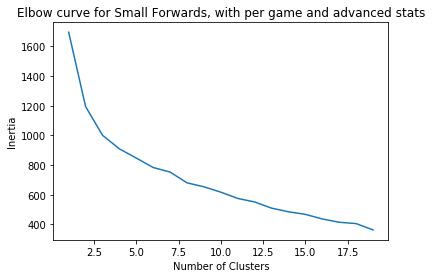

In [4]:
cluster_number = range(1, 20)
sf_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
sf_inertia = [sf_kmeans_models[i].fit(X).inertia_ for i in range(len(sf_kmeans_models))]
plt.plot(cluster_number, sf_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Small Forwards, with per game and advanced stats')
plt.savefig('Figures/SF/kmeans-full.png')
plt.show()

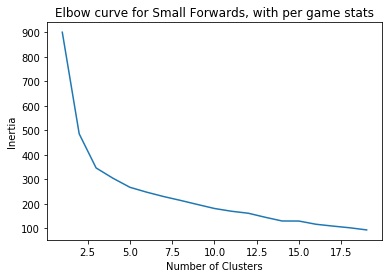

In [5]:
X_per_game_unscaled = small_forwards_data.copy()
X_per_game_unscaled = X_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%', 'DefRtg',
                                                'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate', 'OR%', 'DR%', 'BLK%',
                                                'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_per_game = StandardScaler()
scaler_per_game.fit(X_per_game_unscaled)
X_per_game = scaler_per_game.transform(X_per_game_unscaled)

sf_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
sf_inertia_per_game = [sf_kmeans_models_per_game[i].fit(X_per_game).inertia_ for i in range(len(sf_kmeans_models_per_game))]
plt.plot(cluster_number, sf_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Small Forwards, with per game stats')
plt.savefig('Figures/SF/kmeans-per-game.png')
plt.show()

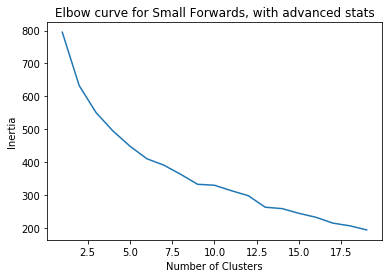

In [6]:
X_advanced_unscaled = small_forwards_data.copy()
X_advanced_unscaled = X_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                'scored_points_per_game', 'field_goals_made_per_game',
                                                'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                'three_points_field_goals_made_per_game',
                                                'three_points_field_goals_attempts_per_game',
                                                'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                'free_throws_attempts_per_game', 'assists_per_game',
                                                'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                'personal_fouls_per_game'], 1)
scaler_advanced = StandardScaler()
scaler_advanced.fit(X_advanced_unscaled)
X_advanced = scaler_advanced.transform(X_advanced_unscaled)

sf_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
sf_inertia_advanced = [sf_kmeans_models_advanced[i].fit(X_advanced).inertia_ for i in range(len(sf_kmeans_models_advanced))]
plt.plot(cluster_number, sf_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Small Forwards, with advanced stats')
plt.savefig('Figures/SF/kmeans-advanced.png')
plt.show()

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 5.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [7]:
# KMeans_sf_full = KMeans(n_clusters=6, n_init=200).fit(X)
# joblib.dump(KMeans_sf_full, 'Models/kmeans_sf_full.sav')

KMeans_sf_full = joblib.load('Models/kmeans_sf_full.sav')

sf_full_predicted_classes = KMeans_sf_full.predict(X)
sf_full = small_forwards_data.copy()
sf_full.insert(1, 'Cluster', sf_full_predicted_classes)
sf_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,200757,2,Thabo,Sefolosha,1474.865,7.000,2.838,2.676,5.514,0.541,...,0.563725,0.230392,0.098039,3.585926,18.075794,1.707651,13.478127,8.936384,2.938303,12.977360
7,203145,3,Kent,Bazemore,1707.053,12.974,4.658,5.421,10.079,1.711,...,0.546997,0.227154,0.169713,1.077375,16.664334,1.360948,13.188262,13.393757,2.374904,20.401574
16,203109,3,Jae,Crowder,1929.048,14.119,4.857,5.952,10.810,1.667,...,0.526432,0.310573,0.154185,3.622172,14.117093,1.416811,10.415943,8.362418,2.997809,18.528413
19,2210,0,Richard,Jefferson,1170.162,6.027,2.135,2.622,4.757,0.973,...,0.551136,0.284091,0.204545,0.969807,7.549786,1.064180,11.607143,6.906131,1.349802,14.575963
20,2544,4,LeBron,James,2112.026,25.158,9.526,9.553,19.079,1.158,...,0.529655,0.365517,0.060690,4.011040,20.017675,1.786058,13.021910,36.216334,2.265429,33.966433
32,201967,0,Dante,Cunningham,1197.600,4.325,1.675,2.125,3.800,0.650,...,0.526316,0.131579,0.171053,3.181621,16.285545,1.679169,6.944444,4.793758,1.260611,11.853536
33,202087,2,Alonzo,Gee,1236.857,4.048,1.643,1.595,3.238,0.262,...,0.547794,0.183824,0.080882,4.400912,15.163567,0.774225,16.477273,8.178269,2.019038,11.133195
45,203503,0,Tony,Snell,1352.789,5.711,2.132,3.684,5.816,1.026,...,0.454751,0.081448,0.176471,1.392702,13.543781,0.948473,13.589008,6.213384,0.793745,13.304321
46,203926,0,Doug,McDermott,1262.103,7.128,2.769,3.718,6.487,1.256,...,0.523715,0.063241,0.193676,2.247858,8.795879,0.360203,9.406355,5.187608,0.382599,15.054798
54,202083,3,Wesley,Matthews,1983.359,13.000,4.410,7.026,11.436,2.513,...,0.495516,0.165919,0.219731,1.611759,10.138831,0.783850,8.244497,9.991622,1.776152,20.533931


In [8]:
sf_full_cluster_size = pd.DataFrame()
sf_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
sf_full_cluster_size['Players'] = sf_full.groupby('Cluster').size()
sf_full_cluster_size

,Cluster,Players
0,0,12
1,1,5
2,2,8
3,3,11
4,4,4
5,5,13


In [9]:
# KMeans_sf_per_game = KMeans(n_clusters=5, n_init=200).fit(X_per_game)
# joblib.dump(KMeans_sf_per_game, 'Models/kmeans_sf_per_game.sav')

KMeans_sf_per_game = joblib.load('Models/kmeans_sf_per_game.sav')

sf_per_game_predicted_classes = KMeans_sf_per_game.predict(X_per_game)
sf_per_game = small_forwards_data.copy()
sf_per_game.insert(1, 'Cluster', sf_per_game_predicted_classes)
sf_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,200757,0,Thabo,Sefolosha,1474.865,7.000,2.838,2.676,5.514,0.541,...,0.563725,0.230392,0.098039,3.585926,18.075794,1.707651,13.478127,8.936384,2.938303,12.977360
7,203145,3,Kent,Bazemore,1707.053,12.974,4.658,5.421,10.079,1.711,...,0.546997,0.227154,0.169713,1.077375,16.664334,1.360948,13.188262,13.393757,2.374904,20.401574
16,203109,3,Jae,Crowder,1929.048,14.119,4.857,5.952,10.810,1.667,...,0.526432,0.310573,0.154185,3.622172,14.117093,1.416811,10.415943,8.362418,2.997809,18.528413
19,2210,1,Richard,Jefferson,1170.162,6.027,2.135,2.622,4.757,0.973,...,0.551136,0.284091,0.204545,0.969807,7.549786,1.064180,11.607143,6.906131,1.349802,14.575963
20,2544,2,LeBron,James,2112.026,25.158,9.526,9.553,19.079,1.158,...,0.529655,0.365517,0.060690,4.011040,20.017675,1.786058,13.021910,36.216334,2.265429,33.966433
32,201967,1,Dante,Cunningham,1197.600,4.325,1.675,2.125,3.800,0.650,...,0.526316,0.131579,0.171053,3.181621,16.285545,1.679169,6.944444,4.793758,1.260611,11.853536
33,202087,1,Alonzo,Gee,1236.857,4.048,1.643,1.595,3.238,0.262,...,0.547794,0.183824,0.080882,4.400912,15.163567,0.774225,16.477273,8.178269,2.019038,11.133195
45,203503,1,Tony,Snell,1352.789,5.711,2.132,3.684,5.816,1.026,...,0.454751,0.081448,0.176471,1.392702,13.543781,0.948473,13.589008,6.213384,0.793745,13.304321
46,203926,1,Doug,McDermott,1262.103,7.128,2.769,3.718,6.487,1.256,...,0.523715,0.063241,0.193676,2.247858,8.795879,0.360203,9.406355,5.187608,0.382599,15.054798
54,202083,3,Wesley,Matthews,1983.359,13.000,4.410,7.026,11.436,2.513,...,0.495516,0.165919,0.219731,1.611759,10.138831,0.783850,8.244497,9.991622,1.776152,20.533931


In [10]:
sf_per_game_cluster_size = pd.DataFrame()
sf_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sf_per_game_cluster_size['Players'] = sf_per_game.groupby('Cluster').size()
sf_per_game_cluster_size

,Cluster,Players
0,0,12
1,1,21
2,2,5
3,3,10
4,4,5


In [11]:
# KMeans_sf_advanced = KMeans(n_clusters=5, n_init=200).fit(X_advanced)
# joblib.dump(KMeans_sf_advanced, 'Models/kmeans_sf_advanced.sav')

KMeans_sf_advanced = joblib.load('Models/kmeans_sf_advanced.sav')

sf_advanced_predicted_classes = KMeans_sf_advanced.predict(X_advanced)
sf_advanced = small_forwards_data.copy()
sf_advanced.insert(1, 'Cluster', sf_advanced_predicted_classes)
sf_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,200757,1,Thabo,Sefolosha,1474.865,7.000,2.838,2.676,5.514,0.541,...,0.563725,0.230392,0.098039,3.585926,18.075794,1.707651,13.478127,8.936384,2.938303,12.977360
7,203145,1,Kent,Bazemore,1707.053,12.974,4.658,5.421,10.079,1.711,...,0.546997,0.227154,0.169713,1.077375,16.664334,1.360948,13.188262,13.393757,2.374904,20.401574
16,203109,1,Jae,Crowder,1929.048,14.119,4.857,5.952,10.810,1.667,...,0.526432,0.310573,0.154185,3.622172,14.117093,1.416811,10.415943,8.362418,2.997809,18.528413
19,2210,4,Richard,Jefferson,1170.162,6.027,2.135,2.622,4.757,0.973,...,0.551136,0.284091,0.204545,0.969807,7.549786,1.064180,11.607143,6.906131,1.349802,14.575963
20,2544,1,LeBron,James,2112.026,25.158,9.526,9.553,19.079,1.158,...,0.529655,0.365517,0.060690,4.011040,20.017675,1.786058,13.021910,36.216334,2.265429,33.966433
32,201967,4,Dante,Cunningham,1197.600,4.325,1.675,2.125,3.800,0.650,...,0.526316,0.131579,0.171053,3.181621,16.285545,1.679169,6.944444,4.793758,1.260611,11.853536
33,202087,3,Alonzo,Gee,1236.857,4.048,1.643,1.595,3.238,0.262,...,0.547794,0.183824,0.080882,4.400912,15.163567,0.774225,16.477273,8.178269,2.019038,11.133195
45,203503,2,Tony,Snell,1352.789,5.711,2.132,3.684,5.816,1.026,...,0.454751,0.081448,0.176471,1.392702,13.543781,0.948473,13.589008,6.213384,0.793745,13.304321
46,203926,4,Doug,McDermott,1262.103,7.128,2.769,3.718,6.487,1.256,...,0.523715,0.063241,0.193676,2.247858,8.795879,0.360203,9.406355,5.187608,0.382599,15.054798
54,202083,4,Wesley,Matthews,1983.359,13.000,4.410,7.026,11.436,2.513,...,0.495516,0.165919,0.219731,1.611759,10.138831,0.783850,8.244497,9.991622,1.776152,20.533931


In [12]:
sf_advanced_cluster_size = pd.DataFrame()
sf_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sf_advanced_cluster_size['Players'] = sf_advanced.groupby('Cluster').size()
sf_advanced_cluster_size.to_csv('Data/sf.csv')
sf_advanced_cluster_size

,Cluster,Players
0,0,5
1,1,11
2,2,13
3,3,14
4,4,10


Now we are going to group the players and see the players grouped by each cluster.

## Model fitted with all the stats.

In [13]:
sf_full['played_minutes_per_game'] = sf_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster0 = sf_full[sf_full['Cluster'] == 0]
sf_full_cluster0 = sf_full_cluster0.drop(['player_id'], 1)
sf_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
19,0,Richard,Jefferson,19.50,6.03,2.13,2.62,4.76,0.97,2.51,...,0.55,0.28,0.20,0.97,7.55,1.06,11.61,6.91,1.35,14.58
32,0,Dante,Cunningham,19.96,4.33,1.68,2.12,3.80,0.65,1.82,...,0.53,0.13,0.17,3.18,16.29,1.68,6.94,4.79,1.26,11.85
45,0,Tony,Snell,22.55,5.71,2.13,3.68,5.82,1.03,2.87,...,0.45,0.08,0.18,1.39,13.54,0.95,13.59,6.21,0.79,13.30
46,0,Doug,McDermott,21.04,7.13,2.77,3.72,6.49,1.26,2.95,...,0.52,0.06,0.19,2.25,8.80,0.36,9.41,5.19,0.38,15.05
86,0,Paul,Pierce,17.46,6.08,2.06,3.58,5.64,1.19,3.58,...,0.47,0.17,0.21,1.45,17.30,0.78,9.90,7.18,1.34,17.30
94,0,Wesley,Johnson,18.39,6.62,2.44,3.05,5.49,1.31,3.56,...,0.56,0.13,0.24,2.71,11.67,2.74,9.95,4.77,2.56,15.71
123,0,Tayshaun,Prince,20.63,3.14,1.48,1.68,3.16,0.04,0.27,...,0.47,0.08,0.01,2.54,8.39,0.58,9.44,6.22,1.25,7.97
138,0,Bojan,Bogdanovic,27.31,9.49,3.58,4.88,8.46,1.29,3.83,...,0.50,0.15,0.15,2.12,13.04,0.23,12.31,5.91,0.99,17.26
237,0,Terrence,Ross,22.89,8.50,3.17,4.06,7.22,1.61,4.17,...,0.55,0.08,0.22,1.59,9.96,1.58,9.10,4.80,1.83,16.55
246,0,Joe,Ingles,13.78,4.02,1.49,2.15,3.63,0.93,2.46,...,0.54,0.04,0.26,1.51,11.83,0.47,16.05,12.38,2.17,15.17


In [15]:
sf_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       20.62
scored_points_per_game                         6.30
field_goals_made_per_game                      2.33
field_goals_miss_per_game                      3.28
field_goals_attempts_per_game                  5.62
three_points_field_goals_made_per_game         1.05
three_points_field_goals_attempts_per_game     2.92
free_throws_made_per_game                      0.58
free_throws_miss_per_game                      0.21
free_throws_attempts_per_game                  0.79
assists_per_game                               0.88
offensive_rebounds_per_game                    0.36
defensive_rebounds_per_game                    2.18
steals_per_game                                0.55
blocks_per_game                                0.24
turnovers_per_game                             0.68
personal_fouls_per_game                        1.67
OffRtg                                       116.45
Floor%      

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster1 = sf_full[sf_full['Cluster'] == 1]
sf_full_cluster1 = sf_full_cluster1.drop(['player_id'], 1)
sf_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
119,1,Giannis,Antetokounmpo,33.98,15.58,5.91,5.77,11.67,0.30,1.30,...,0.52,0.39,0.03,5.14,20.35,2.85,15.40,15.67,1.54,24.06
130,1,Adrew,Wiggins,34.78,20.91,7.39,9.28,16.67,0.60,2.46,...,0.46,0.45,0.04,5.43,7.64,1.41,10.25,9.68,1.30,29.11
140,1,Anthony,Carmelo,34.29,21.29,7.62,9.98,17.59,1.36,4.09,...,0.47,0.33,0.08,5.14,19.14,1.21,10.96,21.68,1.35,29.88
199,1,Rudy,Gay,34.01,17.92,7.16,8.24,15.40,1.00,3.13,...,0.50,0.21,0.06,5.57,16.29,1.73,9.17,8.39,1.92,23.14
239,1,Gordon,Hayward,35.01,19.98,6.50,8.38,14.88,1.93,5.07,...,0.50,0.41,0.13,2.82,15.01,0.78,13.06,19.39,1.89,27.43


In [17]:
sf_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       34.41
scored_points_per_game                        19.13
field_goals_made_per_game                      6.92
field_goals_miss_per_game                      8.33
field_goals_attempts_per_game                 15.25
three_points_field_goals_made_per_game         1.04
three_points_field_goals_attempts_per_game     3.21
free_throws_made_per_game                      4.26
free_throws_miss_per_game                      1.18
free_throws_attempts_per_game                  5.44
assists_per_game                               2.78
offensive_rebounds_per_game                    1.40
defensive_rebounds_per_game                    4.65
steals_per_game                                1.03
blocks_per_game                                0.64
turnovers_per_game                             2.32
personal_fouls_per_game                        2.63
OffRtg                                       110.94
Floor%      

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster2 = sf_full[sf_full['Cluster'] == 2]
sf_full_cluster2 = sf_full_cluster2.drop(['player_id'], 1)
sf_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,2,Thabo,Sefolosha,24.58,7.00,2.84,2.68,5.51,0.54,1.81,...,0.56,0.23,0.10,3.59,18.08,1.71,13.48,8.94,2.94,12.98
33,2,Alonzo,Gee,20.61,4.05,1.64,1.59,3.24,0.26,0.88,...,0.55,0.18,0.08,4.40,15.16,0.77,16.48,8.18,2.02,11.13
68,2,Andre,Iguodala,27.17,7.67,2.93,2.93,5.86,0.98,2.52,...,0.58,0.20,0.17,3.99,12.54,1.04,16.53,17.11,2.31,12.52
73,2,Harrison,Barnes,29.13,12.69,4.77,5.12,9.88,1.19,3.00,...,0.54,0.24,0.12,4.75,12.68,0.49,8.69,9.23,1.58,18.29
181,2,PJ,Tucker,29.51,7.00,2.60,3.62,6.21,0.83,2.33,...,0.48,0.20,0.13,6.60,16.09,0.77,14.72,7.84,2.12,11.69
188,2,TJ,Warren,22.63,10.98,4.68,4.68,9.37,0.58,1.46,...,0.53,0.15,0.06,6.25,10.06,1.31,6.40,7.05,1.94,20.53
264,2,Otto,Porter,32.05,12.47,4.85,5.74,10.59,1.18,3.77,...,0.51,0.19,0.11,4.97,15.75,0.93,9.50,10.30,2.61,17.79
279,2,Jeremy,Lamb,21.65,10.92,4.34,4.92,9.26,1.00,3.21,...,0.52,0.17,0.11,4.37,21.19,1.75,8.24,13.47,1.52,26.49


In [19]:
sf_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       25.92
scored_points_per_game                         9.10
field_goals_made_per_game                      3.58
field_goals_miss_per_game                      3.91
field_goals_attempts_per_game                  7.49
three_points_field_goals_made_per_game         0.82
three_points_field_goals_attempts_per_game     2.37
free_throws_made_per_game                      1.11
free_throws_miss_per_game                      0.34
free_throws_attempts_per_game                  1.46
assists_per_game                               1.72
offensive_rebounds_per_game                    1.10
defensive_rebounds_per_game                    3.42
steals_per_game                                1.08
blocks_per_game                                0.33
turnovers_per_game                             0.99
personal_fouls_per_game                        1.99
OffRtg                                       123.35
Floor%      

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster3 = sf_full[sf_full['Cluster'] == 3]
sf_full_cluster3 = sf_full_cluster3.drop(['player_id'], 1)
sf_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
7,3,Kent,Bazemore,28.45,12.97,4.66,5.42,10.08,1.71,4.05,...,0.55,0.23,0.17,1.08,16.66,1.36,13.19,13.39,2.37,20.40
16,3,Jae,Crowder,32.15,14.12,4.86,5.95,10.81,1.67,4.67,...,0.53,0.31,0.15,3.62,14.12,1.42,10.42,8.36,3.00,18.53
54,3,Wesley,Matthews,33.06,13.00,4.41,7.03,11.44,2.51,7.08,...,0.50,0.17,0.22,1.61,10.14,0.78,8.24,9.99,1.78,20.53
78,3,Trevor,Ariza,33.97,11.50,4.07,6.31,10.38,2.10,5.95,...,0.49,0.16,0.20,2.26,13.69,0.61,11.21,8.83,2.71,16.35
132,3,Joe,Johnson,34.09,11.22,4.27,6.66,10.93,1.46,4.07,...,0.46,0.14,0.13,2.26,10.78,0.06,13.31,17.32,1.02,17.95
162,3,CJ,Miles,26.56,13.08,4.42,6.56,10.97,2.50,6.83,...,0.52,0.22,0.23,1.96,11.02,1.72,8.27,6.71,2.25,21.92
173,3,Robert,Covington,25.79,10.30,3.39,5.91,9.30,1.85,5.82,...,0.46,0.23,0.20,3.33,22.55,2.07,19.34,11.37,3.29,24.38
190,3,Al-Farouq,Aminu,29.04,10.67,3.84,5.44,9.29,1.51,4.24,...,0.50,0.22,0.16,4.58,20.87,2.04,13.91,8.74,1.54,18.99
232,3,DeMarre,Carroll,31.94,11.65,4.30,6.78,11.09,1.83,4.83,...,0.47,0.19,0.16,4.53,12.72,0.59,8.91,5.35,2.78,18.97
249,3,Matt,Barnes,26.15,8.79,3.13,4.71,7.84,1.26,4.18,...,0.48,0.20,0.16,4.39,17.94,2.74,12.67,11.01,2.36,18.64


In [21]:
sf_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       30.63
scored_points_per_game                        11.94
field_goals_made_per_game                      4.22
field_goals_miss_per_game                      6.15
field_goals_attempts_per_game                 10.37
three_points_field_goals_made_per_game         1.77
three_points_field_goals_attempts_per_game     5.00
free_throws_made_per_game                      1.73
free_throws_miss_per_game                      0.50
free_throws_attempts_per_game                  2.24
assists_per_game                               1.85
offensive_rebounds_per_game                    0.83
defensive_rebounds_per_game                    3.85
steals_per_game                                1.28
blocks_per_game                                0.43
turnovers_per_game                             1.52
personal_fouls_per_game                        2.50
OffRtg                                       110.69
Floor%      

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster4 = sf_full[sf_full['Cluster'] == 4]
sf_full_cluster4 = sf_full_cluster4.drop(['player_id'], 1)
sf_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
20,4,LeBron,James,35.20,25.16,9.53,9.55,19.08,1.16,3.95,...,0.53,0.37,0.06,4.01,20.02,1.79,13.02,36.22,2.27,33.97
168,4,Paul,George,34.70,23.51,7.46,10.63,18.10,2.78,7.42,...,0.49,0.38,0.15,2.79,20.51,0.69,15.19,19.73,2.84,31.90
216,4,Kawhi,Leonard,32.98,20.15,7.41,7.18,14.59,1.85,3.87,...,0.57,0.27,0.13,5.08,19.54,2.30,7.41,13.36,3.23,26.13
219,4,Kevin,Durant,35.26,26.54,9.16,8.78,17.95,2.27,5.81,...,0.57,0.37,0.13,1.38,21.92,2.68,12.16,23.01,1.35,29.97


In [23]:
sf_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       34.53
scored_points_per_game                        23.84
field_goals_made_per_game                      8.39
field_goals_miss_per_game                      9.04
field_goals_attempts_per_game                 17.43
three_points_field_goals_made_per_game         2.01
three_points_field_goals_attempts_per_game     5.26
free_throws_made_per_game                      5.05
free_throws_miss_per_game                      1.08
free_throws_attempts_per_game                  6.13
assists_per_game                               4.25
offensive_rebounds_per_game                    0.95
defensive_rebounds_per_game                    6.33
steals_per_game                                1.57
blocks_per_game                                0.80
turnovers_per_game                             2.82
personal_fouls_per_game                        2.15
OffRtg                                       124.48
Floor%      

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_full_cluster5 = sf_full[sf_full['Cluster'] == 5]
sf_full_cluster5 = sf_full_cluster5.drop(['player_id'], 1)
sf_full_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
79,5,Corey,Brewer,19.71,6.84,2.40,4.19,6.58,0.81,2.74,...,0.43,0.23,0.12,2.99,10.91,0.41,12.37,11.69,2.90,18.59
95,5,Lance,Stephenson,15.28,3.34,1.31,2.03,3.34,0.31,1.06,...,0.44,0.18,0.09,3.50,13.12,0.34,23.28,12.80,1.83,13.79
112,5,Justise,Winslow,26.91,5.50,2.10,3.29,5.39,0.47,1.92,...,0.43,0.23,0.09,3.73,16.17,1.03,18.70,7.06,1.31,13.29
128,5,Shabazz,Muhammad,19.99,9.93,3.64,3.89,7.52,0.59,1.77,...,0.52,0.35,0.08,6.06,11.29,0.40,9.48,3.84,0.55,21.85
145,5,Derrick,Williams,16.41,9.09,2.98,3.77,6.75,0.46,1.91,...,0.47,0.53,0.07,3.90,20.08,0.66,7.82,8.81,1.27,24.91
160,5,Mario,Hezonja,13.70,4.55,1.60,2.21,3.82,0.60,1.63,...,0.50,0.21,0.16,3.24,10.19,0.69,20.58,10.43,0.82,17.15
167,5,Chase,Budinger,16.45,4.86,1.75,2.61,4.36,0.50,1.67,...,0.46,0.28,0.11,3.73,13.68,0.97,11.98,9.86,1.73,15.05
176,5,JaKarr,Sampson,15.15,5.47,1.98,2.48,4.45,0.15,0.75,...,0.46,0.49,0.03,4.86,17.03,1.85,16.88,8.12,0.86,21.31
194,5,Maurice,Harkless,17.30,5.07,1.98,2.36,4.33,0.42,1.58,...,0.51,0.28,0.10,6.67,13.78,1.61,15.13,7.63,1.57,15.45
217,5,Kyle,Anderson,12.07,3.37,1.29,1.40,2.68,0.10,0.37,...,0.50,0.37,0.04,2.51,17.94,2.61,15.63,12.57,1.77,14.99


In [25]:
sf_full_cluster5.mean()

Cluster                                        5.00
played_minutes_per_game                       18.19
scored_points_per_game                         6.18
field_goals_made_per_game                      2.25
field_goals_miss_per_game                      3.18
field_goals_attempts_per_game                  5.42
three_points_field_goals_made_per_game         0.49
three_points_field_goals_attempts_per_game     1.67
free_throws_made_per_game                      1.19
free_throws_miss_per_game                      0.43
free_throws_attempts_per_game                  1.63
assists_per_game                               1.04
offensive_rebounds_per_game                    0.65
defensive_rebounds_per_game                    2.35
steals_per_game                                0.51
blocks_per_game                                0.21
turnovers_per_game                             0.98
personal_fouls_per_game                        1.61
OffRtg                                       104.05
Floor%      

## Model fitted with per game stats.

In [26]:
sf_per_game['played_minutes_per_game'] = sf_per_game['played_minutes_per_game'].apply(lambda sec: sec/60)

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_per_game_cluster0 = sf_per_game[sf_per_game['Cluster'] == 0]
sf_per_game_cluster0 = sf_per_game_cluster0.drop(['player_id'], 1)
sf_per_game_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,0,Thabo,Sefolosha,24.58,7.00,2.84,2.68,5.51,0.54,1.81,...,0.56,0.23,0.10,3.59,18.08,1.71,13.48,8.94,2.94,12.98
68,0,Andre,Iguodala,27.17,7.67,2.93,2.93,5.86,0.98,2.52,...,0.58,0.20,0.17,3.99,12.54,1.04,16.53,17.11,2.31,12.52
73,0,Harrison,Barnes,29.13,12.69,4.77,5.12,9.88,1.19,3.00,...,0.54,0.24,0.12,4.75,12.68,0.49,8.69,9.23,1.58,18.29
112,0,Justise,Winslow,26.91,5.50,2.10,3.29,5.39,0.47,1.92,...,0.43,0.23,0.09,3.73,16.17,1.03,18.70,7.06,1.31,13.29
132,0,Joe,Johnson,34.09,11.22,4.27,6.66,10.93,1.46,4.07,...,0.46,0.14,0.13,2.26,10.78,0.06,13.31,17.32,1.02,17.95
138,0,Bojan,Bogdanovic,27.31,9.49,3.58,4.88,8.46,1.29,3.83,...,0.50,0.15,0.15,2.12,13.04,0.23,12.31,5.91,0.99,17.26
181,0,PJ,Tucker,29.51,7.00,2.60,3.62,6.21,0.83,2.33,...,0.48,0.20,0.13,6.60,16.09,0.77,14.72,7.84,2.12,11.69
188,0,TJ,Warren,22.63,10.98,4.68,4.68,9.37,0.58,1.46,...,0.53,0.15,0.06,6.25,10.06,1.31,6.40,7.05,1.94,20.53
252,0,Jeff,Green,27.75,10.00,3.60,5.65,9.25,0.57,2.05,...,0.42,0.31,0.06,4.14,15.61,1.14,11.56,12.35,1.52,21.39
260,0,Garrett,Temple,24.23,8.18,2.87,4.03,6.89,1.13,3.26,...,0.50,0.27,0.16,2.13,10.56,0.91,8.43,11.27,2.08,15.63


In [28]:
sf_per_game_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       26.43
scored_points_per_game                         9.05
field_goals_made_per_game                      3.47
field_goals_miss_per_game                      4.47
field_goals_attempts_per_game                  7.93
three_points_field_goals_made_per_game         0.90
three_points_field_goals_attempts_per_game     2.68
free_throws_made_per_game                      1.21
free_throws_miss_per_game                      0.39
free_throws_attempts_per_game                  1.60
assists_per_game                               1.81
offensive_rebounds_per_game                    0.91
defensive_rebounds_per_game                    3.29
steals_per_game                                0.88
blocks_per_game                                0.28
turnovers_per_game                             1.16
personal_fouls_per_game                        1.93
OffRtg                                       114.32
Floor%      

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_per_game_cluster1 = sf_per_game[sf_per_game['Cluster'] == 1]
sf_per_game_cluster1 = sf_per_game_cluster1.drop(['player_id'], 1)
sf_per_game_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
19,1,Richard,Jefferson,19.50,6.03,2.13,2.62,4.76,0.97,2.51,...,0.55,0.28,0.20,0.97,7.55,1.06,11.61,6.91,1.35,14.58
32,1,Dante,Cunningham,19.96,4.33,1.68,2.12,3.80,0.65,1.82,...,0.53,0.13,0.17,3.18,16.29,1.68,6.94,4.79,1.26,11.85
33,1,Alonzo,Gee,20.61,4.05,1.64,1.59,3.24,0.26,0.88,...,0.55,0.18,0.08,4.40,15.16,0.77,16.48,8.18,2.02,11.13
45,1,Tony,Snell,22.55,5.71,2.13,3.68,5.82,1.03,2.87,...,0.45,0.08,0.18,1.39,13.54,0.95,13.59,6.21,0.79,13.30
46,1,Doug,McDermott,21.04,7.13,2.77,3.72,6.49,1.26,2.95,...,0.52,0.06,0.19,2.25,8.80,0.36,9.41,5.19,0.38,15.05
79,1,Corey,Brewer,19.71,6.84,2.40,4.19,6.58,0.81,2.74,...,0.43,0.23,0.12,2.99,10.91,0.41,12.37,11.69,2.90,18.59
86,1,Paul,Pierce,17.46,6.08,2.06,3.58,5.64,1.19,3.58,...,0.47,0.17,0.21,1.45,17.30,0.78,9.90,7.18,1.34,17.30
94,1,Wesley,Johnson,18.39,6.62,2.44,3.05,5.49,1.31,3.56,...,0.56,0.13,0.24,2.71,11.67,2.74,9.95,4.77,2.56,15.71
95,1,Lance,Stephenson,15.28,3.34,1.31,2.03,3.34,0.31,1.06,...,0.44,0.18,0.09,3.50,13.12,0.34,23.28,12.80,1.83,13.79
123,1,Tayshaun,Prince,20.63,3.14,1.48,1.68,3.16,0.04,0.27,...,0.47,0.08,0.01,2.54,8.39,0.58,9.44,6.22,1.25,7.97


In [30]:
sf_per_game_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       17.90
scored_points_per_game                         5.66
field_goals_made_per_game                      2.08
field_goals_miss_per_game                      2.82
field_goals_attempts_per_game                  4.90
three_points_field_goals_made_per_game         0.72
three_points_field_goals_attempts_per_game     2.09
free_throws_made_per_game                      0.79
free_throws_miss_per_game                      0.29
free_throws_attempts_per_game                  1.08
assists_per_game                               0.84
offensive_rebounds_per_game                    0.48
defensive_rebounds_per_game                    2.07
steals_per_game                                0.50
blocks_per_game                                0.22
turnovers_per_game                             0.74
personal_fouls_per_game                        1.57
OffRtg                                       112.25
Floor%      

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_per_game_cluster2 = sf_per_game[sf_per_game['Cluster'] == 2]
sf_per_game_cluster2 = sf_per_game_cluster2.drop(['player_id'], 1)
sf_per_game_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
20,2,LeBron,James,35.20,25.16,9.53,9.55,19.08,1.16,3.95,...,0.53,0.37,0.06,4.01,20.02,1.79,13.02,36.22,2.27,33.97
140,2,Anthony,Carmelo,34.29,21.29,7.62,9.98,17.59,1.36,4.09,...,0.47,0.33,0.08,5.14,19.14,1.21,10.96,21.68,1.35,29.88
168,2,Paul,George,34.70,23.51,7.46,10.63,18.10,2.78,7.42,...,0.49,0.38,0.15,2.79,20.51,0.69,15.19,19.73,2.84,31.90
219,2,Kevin,Durant,35.26,26.54,9.16,8.78,17.95,2.27,5.81,...,0.57,0.37,0.13,1.38,21.92,2.68,12.16,23.01,1.35,29.97
239,2,Gordon,Hayward,35.01,19.98,6.50,8.38,14.88,1.93,5.07,...,0.50,0.41,0.13,2.82,15.01,0.78,13.06,19.39,1.89,27.43


In [32]:
sf_per_game_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       34.89
scored_points_per_game                        23.29
field_goals_made_per_game                      8.05
field_goals_miss_per_game                      9.47
field_goals_attempts_per_game                 17.52
three_points_field_goals_made_per_game         1.90
three_points_field_goals_attempts_per_game     5.27
free_throws_made_per_game                      5.29
free_throws_miss_per_game                      1.20
free_throws_attempts_per_game                  6.49
assists_per_game                               4.41
offensive_rebounds_per_game                    0.96
defensive_rebounds_per_game                    5.97
steals_per_game                                1.27
blocks_per_game                                0.62
turnovers_per_game                             3.02
personal_fouls_per_game                        2.28
OffRtg                                       120.19
Floor%      

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_per_game_cluster3 = sf_per_game[sf_per_game['Cluster'] == 3]
sf_per_game_cluster3 = sf_per_game_cluster3.drop(['player_id'], 1)
sf_per_game_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
7,3,Kent,Bazemore,28.45,12.97,4.66,5.42,10.08,1.71,4.05,...,0.55,0.23,0.17,1.08,16.66,1.36,13.19,13.39,2.37,20.40
16,3,Jae,Crowder,32.15,14.12,4.86,5.95,10.81,1.67,4.67,...,0.53,0.31,0.15,3.62,14.12,1.42,10.42,8.36,3.00,18.53
54,3,Wesley,Matthews,33.06,13.00,4.41,7.03,11.44,2.51,7.08,...,0.50,0.17,0.22,1.61,10.14,0.78,8.24,9.99,1.78,20.53
78,3,Trevor,Ariza,33.97,11.50,4.07,6.31,10.38,2.10,5.95,...,0.49,0.16,0.20,2.26,13.69,0.61,11.21,8.83,2.71,16.35
162,3,CJ,Miles,26.56,13.08,4.42,6.56,10.97,2.50,6.83,...,0.52,0.22,0.23,1.96,11.02,1.72,8.27,6.71,2.25,21.92
173,3,Robert,Covington,25.79,10.30,3.39,5.91,9.30,1.85,5.82,...,0.46,0.23,0.20,3.33,22.55,2.07,19.34,11.37,3.29,24.38
190,3,Al-Farouq,Aminu,29.04,10.67,3.84,5.44,9.29,1.51,4.24,...,0.50,0.22,0.16,4.58,20.87,2.04,13.91,8.74,1.54,18.99
232,3,DeMarre,Carroll,31.94,11.65,4.30,6.78,11.09,1.83,4.83,...,0.47,0.19,0.16,4.53,12.72,0.59,8.91,5.35,2.78,18.97
249,3,Matt,Barnes,26.15,8.79,3.13,4.71,7.84,1.26,4.18,...,0.48,0.20,0.16,4.39,17.94,2.74,12.67,11.01,2.36,18.64
264,3,Otto,Porter,32.05,12.47,4.85,5.74,10.59,1.18,3.77,...,0.51,0.19,0.11,4.97,15.75,0.93,9.50,10.30,2.61,17.79


In [34]:
sf_per_game_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       29.92
scored_points_per_game                        11.86
field_goals_made_per_game                      4.19
field_goals_miss_per_game                      5.98
field_goals_attempts_per_game                 10.18
three_points_field_goals_made_per_game         1.81
three_points_field_goals_attempts_per_game     5.14
free_throws_made_per_game                      1.66
free_throws_miss_per_game                      0.48
free_throws_attempts_per_game                  2.14
assists_per_game                               1.67
offensive_rebounds_per_game                    0.85
defensive_rebounds_per_game                    3.94
steals_per_game                                1.41
blocks_per_game                                0.48
turnovers_per_game                             1.44
personal_fouls_per_game                        2.57
OffRtg                                       111.01
Floor%      

In [35]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_per_game_cluster4 = sf_per_game[sf_per_game['Cluster'] == 4]
sf_per_game_cluster4 = sf_per_game_cluster4.drop(['player_id'], 1)
sf_per_game_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
119,4,Giannis,Antetokounmpo,33.98,15.58,5.91,5.77,11.67,0.30,1.30,...,0.52,0.39,0.03,5.14,20.35,2.85,15.40,15.67,1.54,24.06
130,4,Adrew,Wiggins,34.78,20.91,7.39,9.28,16.67,0.60,2.46,...,0.46,0.45,0.04,5.43,7.64,1.41,10.25,9.68,1.30,29.11
199,4,Rudy,Gay,34.01,17.92,7.16,8.24,15.40,1.00,3.13,...,0.50,0.21,0.06,5.57,16.29,1.73,9.17,8.39,1.92,23.14
216,4,Kawhi,Leonard,32.98,20.15,7.41,7.18,14.59,1.85,3.87,...,0.57,0.27,0.13,5.08,19.54,2.30,7.41,13.36,3.23,26.13
268,4,Marcus,Morris,35.71,14.05,5.05,6.85,11.90,1.07,3.32,...,0.47,0.31,0.09,3.91,13.23,0.58,11.34,8.94,1.34,19.37


In [36]:
sf_per_game_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       34.29
scored_points_per_game                        17.72
field_goals_made_per_game                      6.58
field_goals_miss_per_game                      7.46
field_goals_attempts_per_game                 14.05
three_points_field_goals_made_per_game         0.97
three_points_field_goals_attempts_per_game     2.82
free_throws_made_per_game                      3.59
free_throws_miss_per_game                      1.01
free_throws_attempts_per_game                  4.60
assists_per_game                               2.16
offensive_rebounds_per_game                    1.47
defensive_rebounds_per_game                    4.53
steals_per_game                                1.20
blocks_per_game                                0.71
turnovers_per_game                             1.90
personal_fouls_per_game                        2.55
OffRtg                                       113.42
Floor%      

## Model fitted with advanced stats.

In [37]:
sf_advanced['played_minutes_per_game'] = sf_advanced['played_minutes_per_game'].apply(lambda sec: sec/60)

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_advanced_cluster0 = sf_advanced[sf_advanced['Cluster'] == 0]
sf_advanced_cluster0 = sf_advanced_cluster0.drop(['player_id'], 1)
sf_advanced_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
119,0,Giannis,Antetokounmpo,33.98,15.58,5.91,5.77,11.67,0.30,1.30,...,0.52,0.39,0.03,5.14,20.35,2.85,15.40,15.67,1.54,24.06
128,0,Shabazz,Muhammad,19.99,9.93,3.64,3.89,7.52,0.59,1.77,...,0.52,0.35,0.08,6.06,11.29,0.40,9.48,3.84,0.55,21.85
130,0,Adrew,Wiggins,34.78,20.91,7.39,9.28,16.67,0.60,2.46,...,0.46,0.45,0.04,5.43,7.64,1.41,10.25,9.68,1.30,29.11
145,0,Derrick,Williams,16.41,9.09,2.98,3.77,6.75,0.46,1.91,...,0.47,0.53,0.07,3.90,20.08,0.66,7.82,8.81,1.27,24.91
176,0,JaKarr,Sampson,15.15,5.47,1.98,2.48,4.45,0.15,0.75,...,0.46,0.49,0.03,4.86,17.03,1.85,16.88,8.12,0.86,21.31


In [39]:
sf_advanced_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       24.06
scored_points_per_game                        12.20
field_goals_made_per_game                      4.38
field_goals_miss_per_game                      5.04
field_goals_attempts_per_game                  9.41
three_points_field_goals_made_per_game         0.42
three_points_field_goals_attempts_per_game     1.64
free_throws_made_per_game                      3.02
free_throws_miss_per_game                      1.06
free_throws_attempts_per_game                  4.08
assists_per_game                               1.30
offensive_rebounds_per_game                    1.04
defensive_rebounds_per_game                    3.00
steals_per_game                                0.53
blocks_per_game                                0.45
turnovers_per_game                             1.50
personal_fouls_per_game                        2.02
OffRtg                                       105.90
Floor%      

In [40]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_advanced_cluster1 = sf_advanced[sf_advanced['Cluster'] == 1]
sf_advanced_cluster1 = sf_advanced_cluster1.drop(['player_id'], 1)
sf_advanced_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,1,Thabo,Sefolosha,24.58,7.00,2.84,2.68,5.51,0.54,1.81,...,0.56,0.23,0.10,3.59,18.08,1.71,13.48,8.94,2.94,12.98
7,1,Kent,Bazemore,28.45,12.97,4.66,5.42,10.08,1.71,4.05,...,0.55,0.23,0.17,1.08,16.66,1.36,13.19,13.39,2.37,20.40
16,1,Jae,Crowder,32.15,14.12,4.86,5.95,10.81,1.67,4.67,...,0.53,0.31,0.15,3.62,14.12,1.42,10.42,8.36,3.00,18.53
20,1,LeBron,James,35.20,25.16,9.53,9.55,19.08,1.16,3.95,...,0.53,0.37,0.06,4.01,20.02,1.79,13.02,36.22,2.27,33.97
68,1,Andre,Iguodala,27.17,7.67,2.93,2.93,5.86,0.98,2.52,...,0.58,0.20,0.17,3.99,12.54,1.04,16.53,17.11,2.31,12.52
140,1,Anthony,Carmelo,34.29,21.29,7.62,9.98,17.59,1.36,4.09,...,0.47,0.33,0.08,5.14,19.14,1.21,10.96,21.68,1.35,29.88
168,1,Paul,George,34.70,23.51,7.46,10.63,18.10,2.78,7.42,...,0.49,0.38,0.15,2.79,20.51,0.69,15.19,19.73,2.84,31.90
216,1,Kawhi,Leonard,32.98,20.15,7.41,7.18,14.59,1.85,3.87,...,0.57,0.27,0.13,5.08,19.54,2.30,7.41,13.36,3.23,26.13
217,1,Kyle,Anderson,12.07,3.37,1.29,1.40,2.68,0.10,0.37,...,0.50,0.37,0.04,2.51,17.94,2.61,15.63,12.57,1.77,14.99
219,1,Kevin,Durant,35.26,26.54,9.16,8.78,17.95,2.27,5.81,...,0.57,0.37,0.13,1.38,21.92,2.68,12.16,23.01,1.35,29.97


In [41]:
sf_advanced_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       30.17
scored_points_per_game                        16.52
field_goals_made_per_game                      5.84
field_goals_miss_per_game                      6.63
field_goals_attempts_per_game                 12.47
three_points_field_goals_made_per_game         1.49
three_points_field_goals_attempts_per_game     3.97
free_throws_made_per_game                      3.36
free_throws_miss_per_game                      0.78
free_throws_attempts_per_game                  4.14
assists_per_game                               3.15
offensive_rebounds_per_game                    0.85
defensive_rebounds_per_game                    4.81
steals_per_game                                1.32
blocks_per_game                                0.58
turnovers_per_game                             2.03
personal_fouls_per_game                        2.06
OffRtg                                       119.70
Floor%      

In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_advanced_cluster2 = sf_advanced[sf_advanced['Cluster'] == 2]
sf_advanced_cluster2 = sf_advanced_cluster2.drop(['player_id'], 1)
sf_advanced_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
45,2,Tony,Snell,22.55,5.71,2.13,3.68,5.82,1.03,2.87,...,0.45,0.08,0.18,1.39,13.54,0.95,13.59,6.21,0.79,13.30
79,2,Corey,Brewer,19.71,6.84,2.40,4.19,6.58,0.81,2.74,...,0.43,0.23,0.12,2.99,10.91,0.41,12.37,11.69,2.90,18.59
86,2,Paul,Pierce,17.46,6.08,2.06,3.58,5.64,1.19,3.58,...,0.47,0.17,0.21,1.45,17.30,0.78,9.90,7.18,1.34,17.30
95,2,Lance,Stephenson,15.28,3.34,1.31,2.03,3.34,0.31,1.06,...,0.44,0.18,0.09,3.50,13.12,0.34,23.28,12.80,1.83,13.79
112,2,Justise,Winslow,26.91,5.50,2.10,3.29,5.39,0.47,1.92,...,0.43,0.23,0.09,3.73,16.17,1.03,18.70,7.06,1.31,13.29
132,2,Joe,Johnson,34.09,11.22,4.27,6.66,10.93,1.46,4.07,...,0.46,0.14,0.13,2.26,10.78,0.06,13.31,17.32,1.02,17.95
138,2,Bojan,Bogdanovic,27.31,9.49,3.58,4.88,8.46,1.29,3.83,...,0.50,0.15,0.15,2.12,13.04,0.23,12.31,5.91,0.99,17.26
160,2,Mario,Hezonja,13.70,4.55,1.60,2.21,3.82,0.60,1.63,...,0.50,0.21,0.16,3.24,10.19,0.69,20.58,10.43,0.82,17.15
173,2,Robert,Covington,25.79,10.30,3.39,5.91,9.30,1.85,5.82,...,0.46,0.23,0.20,3.33,22.55,2.07,19.34,11.37,3.29,24.38
252,2,Jeff,Green,27.75,10.00,3.60,5.65,9.25,0.57,2.05,...,0.42,0.31,0.06,4.14,15.61,1.14,11.56,12.35,1.52,21.39


In [43]:
sf_advanced_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       21.99
scored_points_per_game                         7.06
field_goals_made_per_game                      2.56
field_goals_miss_per_game                      4.10
field_goals_attempts_per_game                  6.66
three_points_field_goals_made_per_game         0.94
three_points_field_goals_attempts_per_game     2.89
free_throws_made_per_game                      1.00
free_throws_miss_per_game                      0.28
free_throws_attempts_per_game                  1.28
assists_per_game                               1.34
offensive_rebounds_per_game                    0.57
defensive_rebounds_per_game                    2.84
steals_per_game                                0.65
blocks_per_game                                0.20
turnovers_per_game                             1.19
personal_fouls_per_game                        2.01
OffRtg                                       101.70
Floor%      

In [44]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_advanced_cluster3 = sf_advanced[sf_advanced['Cluster'] == 3]
sf_advanced_cluster3 = sf_advanced_cluster3.drop(['player_id'], 1)
sf_advanced_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
33,3,Alonzo,Gee,20.61,4.05,1.64,1.59,3.24,0.26,0.88,...,0.55,0.18,0.08,4.40,15.16,0.77,16.48,8.18,2.02,11.13
73,3,Harrison,Barnes,29.13,12.69,4.77,5.12,9.88,1.19,3.00,...,0.54,0.24,0.12,4.75,12.68,0.49,8.69,9.23,1.58,18.29
123,3,Tayshaun,Prince,20.63,3.14,1.48,1.68,3.16,0.04,0.27,...,0.47,0.08,0.01,2.54,8.39,0.58,9.44,6.22,1.25,7.97
167,3,Chase,Budinger,16.45,4.86,1.75,2.61,4.36,0.50,1.67,...,0.46,0.28,0.11,3.73,13.68,0.97,11.98,9.86,1.73,15.05
181,3,PJ,Tucker,29.51,7.00,2.60,3.62,6.21,0.83,2.33,...,0.48,0.20,0.13,6.60,16.09,0.77,14.72,7.84,2.12,11.69
188,3,TJ,Warren,22.63,10.98,4.68,4.68,9.37,0.58,1.46,...,0.53,0.15,0.06,6.25,10.06,1.31,6.40,7.05,1.94,20.53
190,3,Al-Farouq,Aminu,29.04,10.67,3.84,5.44,9.29,1.51,4.24,...,0.50,0.22,0.16,4.58,20.87,2.04,13.91,8.74,1.54,18.99
194,3,Maurice,Harkless,17.30,5.07,1.98,2.36,4.33,0.42,1.58,...,0.51,0.28,0.10,6.67,13.78,1.61,15.13,7.63,1.57,15.45
199,3,Rudy,Gay,34.01,17.92,7.16,8.24,15.40,1.00,3.13,...,0.50,0.21,0.06,5.57,16.29,1.73,9.17,8.39,1.92,23.14
232,3,DeMarre,Carroll,31.94,11.65,4.30,6.78,11.09,1.83,4.83,...,0.47,0.19,0.16,4.53,12.72,0.59,8.91,5.35,2.78,18.97


In [45]:
sf_advanced_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       26.20
scored_points_per_game                         9.59
field_goals_made_per_game                      3.68
field_goals_miss_per_game                      4.60
field_goals_attempts_per_game                  8.28
three_points_field_goals_made_per_game         0.91
three_points_field_goals_attempts_per_game     2.71
free_throws_made_per_game                      1.31
free_throws_miss_per_game                      0.44
free_throws_attempts_per_game                  1.75
assists_per_game                               1.39
offensive_rebounds_per_game                    1.11
defensive_rebounds_per_game                    3.38
steals_per_game                                0.96
blocks_per_game                                0.36
turnovers_per_game                             1.07
personal_fouls_per_game                        2.04
OffRtg                                       117.49
Floor%      

In [46]:
pd.set_option('display.float_format', '{:.2f}'.format)
sf_advanced_cluster4 = sf_advanced[sf_advanced['Cluster'] == 4]
sf_advanced_cluster4 = sf_advanced_cluster4.drop(['player_id'], 1)
sf_advanced_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
19,4,Richard,Jefferson,19.50,6.03,2.13,2.62,4.76,0.97,2.51,...,0.55,0.28,0.20,0.97,7.55,1.06,11.61,6.91,1.35,14.58
32,4,Dante,Cunningham,19.96,4.33,1.68,2.12,3.80,0.65,1.82,...,0.53,0.13,0.17,3.18,16.29,1.68,6.94,4.79,1.26,11.85
46,4,Doug,McDermott,21.04,7.13,2.77,3.72,6.49,1.26,2.95,...,0.52,0.06,0.19,2.25,8.80,0.36,9.41,5.19,0.38,15.05
54,4,Wesley,Matthews,33.06,13.00,4.41,7.03,11.44,2.51,7.08,...,0.50,0.17,0.22,1.61,10.14,0.78,8.24,9.99,1.78,20.53
78,4,Trevor,Ariza,33.97,11.50,4.07,6.31,10.38,2.10,5.95,...,0.49,0.16,0.20,2.26,13.69,0.61,11.21,8.83,2.71,16.35
94,4,Wesley,Johnson,18.39,6.62,2.44,3.05,5.49,1.31,3.56,...,0.56,0.13,0.24,2.71,11.67,2.74,9.95,4.77,2.56,15.71
162,4,CJ,Miles,26.56,13.08,4.42,6.56,10.97,2.50,6.83,...,0.52,0.22,0.23,1.96,11.02,1.72,8.27,6.71,2.25,21.92
237,4,Terrence,Ross,22.89,8.50,3.17,4.06,7.22,1.61,4.17,...,0.55,0.08,0.22,1.59,9.96,1.58,9.10,4.80,1.83,16.55
246,4,Joe,Ingles,13.78,4.02,1.49,2.15,3.63,0.93,2.46,...,0.54,0.04,0.26,1.51,11.83,0.47,16.05,12.38,2.17,15.17
260,4,Garrett,Temple,24.23,8.18,2.87,4.03,6.89,1.13,3.26,...,0.50,0.27,0.16,2.13,10.56,0.91,8.43,11.27,2.08,15.63


In [47]:
sf_advanced_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       23.34
scored_points_per_game                         8.24
field_goals_made_per_game                      2.94
field_goals_miss_per_game                      4.16
field_goals_attempts_per_game                  7.11
three_points_field_goals_made_per_game         1.50
three_points_field_goals_attempts_per_game     4.06
free_throws_made_per_game                      0.86
free_throws_miss_per_game                      0.30
free_throws_attempts_per_game                  1.16
assists_per_game                               1.10
offensive_rebounds_per_game                    0.41
defensive_rebounds_per_game                    2.27
steals_per_game                                0.83
blocks_per_game                                0.32
turnovers_per_game                             0.81
personal_fouls_per_game                        1.87
OffRtg                                       119.40
Floor%      

In [48]:
KMeans_sf = KMeans(n_clusters=5, n_init=2000, init='random').fit(X_advanced)

sf_predicted_classes = KMeans_sf.predict(X_advanced)

sf = small_forwards_data.copy()
sf.insert(1, 'Cluster', sf_predicted_classes)
sf_cluster_size = pd.DataFrame()
sf_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sf_cluster_size['Players'] = sf.groupby('Cluster').size()
sf_cluster_size

,Cluster,Players
0,0,6
1,1,13
2,2,9
3,3,15
4,4,10


In [49]:
joblib.dump(KMeans_sf, 'Models/Finals/kmeans_sf.sav')
sf = sf.drop(['player_id', 'played_minutes_per_game','scored_points_per_game',
              'field_goals_made_per_game','field_goals_miss_per_game', 'field_goals_attempts_per_game',
              'three_points_field_goals_made_per_game', 'three_points_field_goals_attempts_per_game',
              'free_throws_made_per_game', 'free_throws_miss_per_game', 'free_throws_attempts_per_game',
              'assists_per_game', 'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
              'steals_per_game', 'blocks_per_game', 'turnovers_per_game', 'personal_fouls_per_game'], 1)
sf = sf.sort_values(by=['Cluster'])
sf.to_csv('Data/sf.csv')
